# Notebook tutorial for visualising filters (kernels) and feature maps of ResNet50 architecture


In [1]:
# let's start installing the necessary packages



In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import cv2 as cv
import argparse
from torchvision import models, transforms

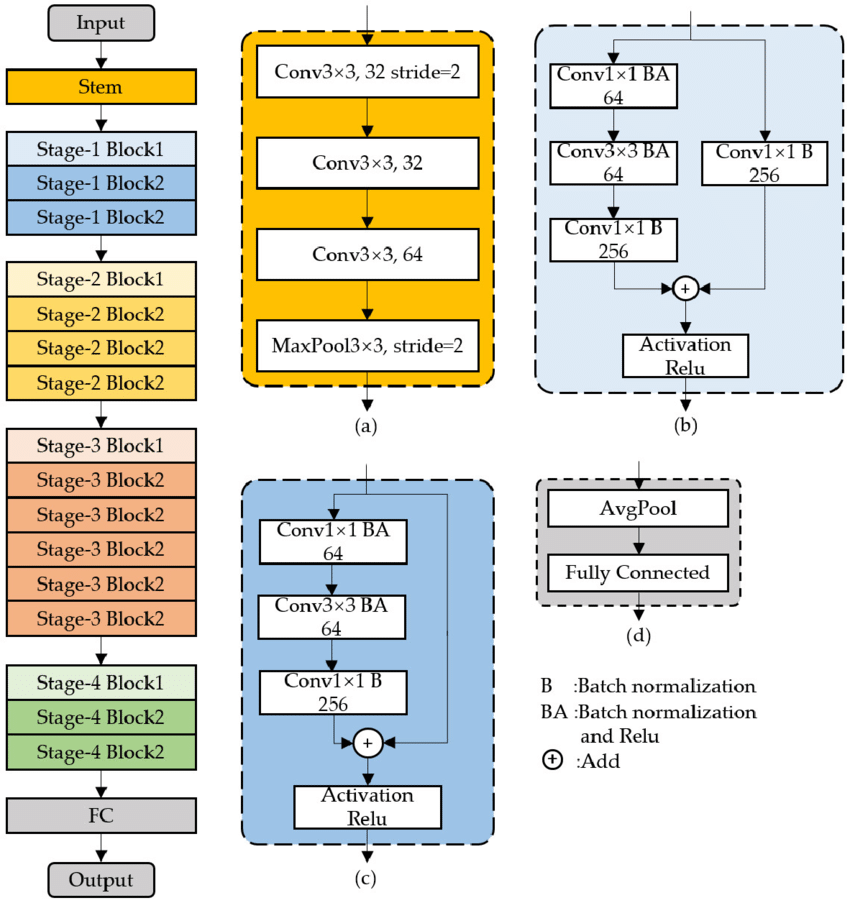

Image source: Wang, Shuai, Xiaojun Xia, Lanqing Ye, and Binbin Yang. "Automatic detection and classification of steel surface defect using deep convolutional neural networks." Metals 11, no. 3 (2021): 388.

* Loading the pre-trained ImageNet weights. This will allow us to get better visualizations without training the convolutional neural network.
* model_weights will save the weights of all the convolutional layers and conv_layers will save all the convolutional layers. It is important to remember that the ResNet-50 model has 50 layers in total. 49 of those layers are convolutional layers and a final fully connected layer.
* model.children() is a generator that returns layers of the model from which you can extract your parameter tensors using "layername.weight" or "layername.bias" and is saved as a list.

In [2]:
# load the model
model = models.resnet50(pretrained=True)
print(model)
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
# get all the model children as list
model_children = list(model.children())

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

At certain stages there are nestings of Bottleneck layers within different layers. Also, the ResNet architecture has many hidden and sequential layers, so to keep only the convolutional layers we check that the two conditions below are satisfied. Then we append the child node and weights to the conv_layers and model_weights respectively.

In [3]:
# counter to keep count of the conv layers
counter = 0 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 49


In [4]:
len(model_weights)

49

In [5]:
# Example
print('Shape of Model weights of 1st Conv2d Layer is',model_weights[0].shape)
print('Model weights of 1st Conv2d Layer is',model_weights[0])

Shape of Model weights of 1st Conv2d Layer is torch.Size([64, 3, 7, 7])
Model weights of 1st Conv2d Layer is Parameter containing:
tensor([[[[ 1.3335e-02,  1.4664e-02, -1.5351e-02,  ..., -4.0896e-02,
           -4.3034e-02, -7.0755e-02],
          [ 4.1205e-03,  5.8477e-03,  1.4948e-02,  ...,  2.2060e-03,
           -2.0912e-02, -3.8517e-02],
          [ 2.2331e-02,  2.3595e-02,  1.6120e-02,  ...,  1.0281e-01,
            6.2641e-02,  5.1977e-02],
          ...,
          [-9.0349e-04,  2.7767e-02, -1.0105e-02,  ..., -1.2722e-01,
           -7.6604e-02,  7.8453e-03],
          [ 3.5894e-03,  4.8006e-02,  6.2051e-02,  ...,  2.4267e-02,
           -3.3662e-02, -1.5709e-02],
          [-8.0029e-02, -3.2238e-02, -1.7808e-02,  ...,  3.5359e-02,
            2.2439e-02,  1.7077e-03]],

         [[-1.8452e-02,  1.1415e-02,  2.3850e-02,  ...,  5.3736e-02,
            4.4022e-02, -9.4675e-03],
          [-7.7273e-03,  1.8890e-02,  6.7981e-02,  ...,  1.5956e-01,
            1.4606e-01,  1.1999e-0

In [6]:
# Example
print('Parameter setting of 1st Conv2d Layer is',conv_layers[0])

Parameter setting of 1st Conv2d Layer is Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


For visualizing the first conv layer filters, we are iterating through the weights of the first convolutional layer.
The output is going to be 64 filters of 7×7 dimensions. The 64 refers to the number of hidden units in that layer.

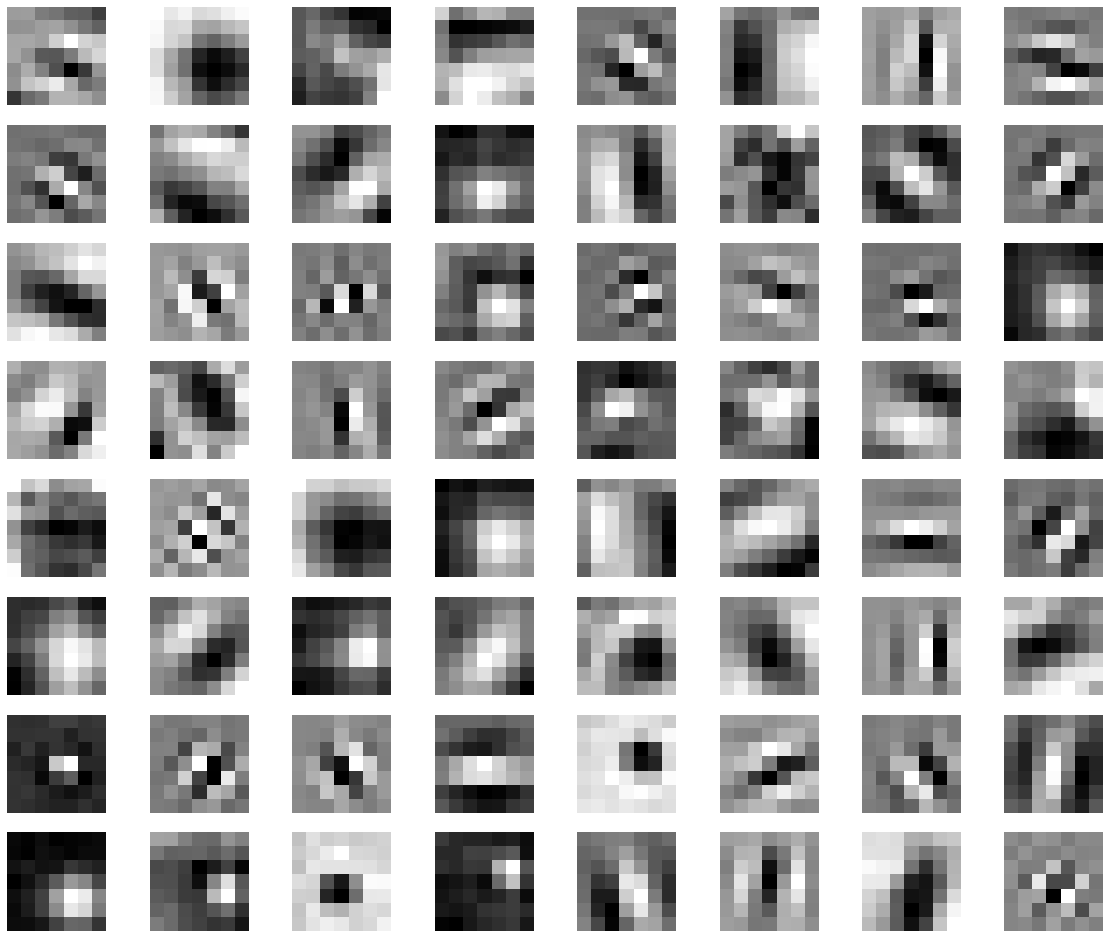

In [7]:
# visualize the first conv layer filters
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    # plt.savefig('../outputs/filter.png') # Optional
plt.show()

We see that diffirent kernels are focusing on different shapes, e.g. diagonal lines, squares etc.

## Reading the image and defining the transform
* We first read the image by specifying the path to image.
* We define the image transformation which first converts the image to PIL format, resizes to a standard dimension of 512x512 and changes the dtype to torch tensor and normalises the image to the 0-1 range.
* Finally we add the batch dimension to the existing image dimension as it is an important step. Now the size of the image, instead of being [3, 512, 512], is [1, 3, 512, 512], indicating that there is only one image in the batch.

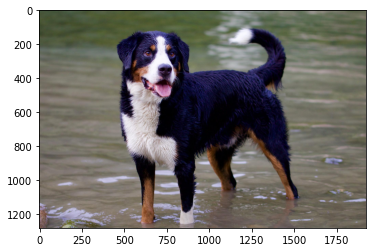

torch.Size([3, 512, 512])
torch.Size([1, 3, 512, 512])


In [8]:
# read and visualize an image
img = cv.imread("/content/animals-g6c19891b2_1920.jpeg") # Insert the path to image.
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
# define the transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])
img = np.array(img)
# apply the transforms
img = transform(img)
print(img.size())
# unsqueeze to add a batch dimension
img = img.unsqueeze(0)
print(img.size())

## Visualizing the Feature Maps of the Convolutional Layers
Visualizing the feature maps of the image after passing through the convolutional layers of the ResNet-50 model consists of two steps:

  * Passing the image through each convolutional layer and saving each layer’s output.
  * Visualizing the feature map blocks of each layer.

We will first give the image as an input to the first convolutional layer. After that, we will use a for loop to pass the last layer’s outputs to the next layer, until we reach the last convolutional layer.

In [9]:
# pass the image through all the layers
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

## Visualizing the Feature Maps
The upper layers (near the fully connected layers) have many feature maps, in the range of 512 to 2048. But we will only visualize 64 feature maps from each layer as any more than that will make the outputs really cluttered.

Size of layer 1 is torch.Size([64, 256, 256])
Feature maps from the first convolutional layer (layer 0) of ResNet-50 model


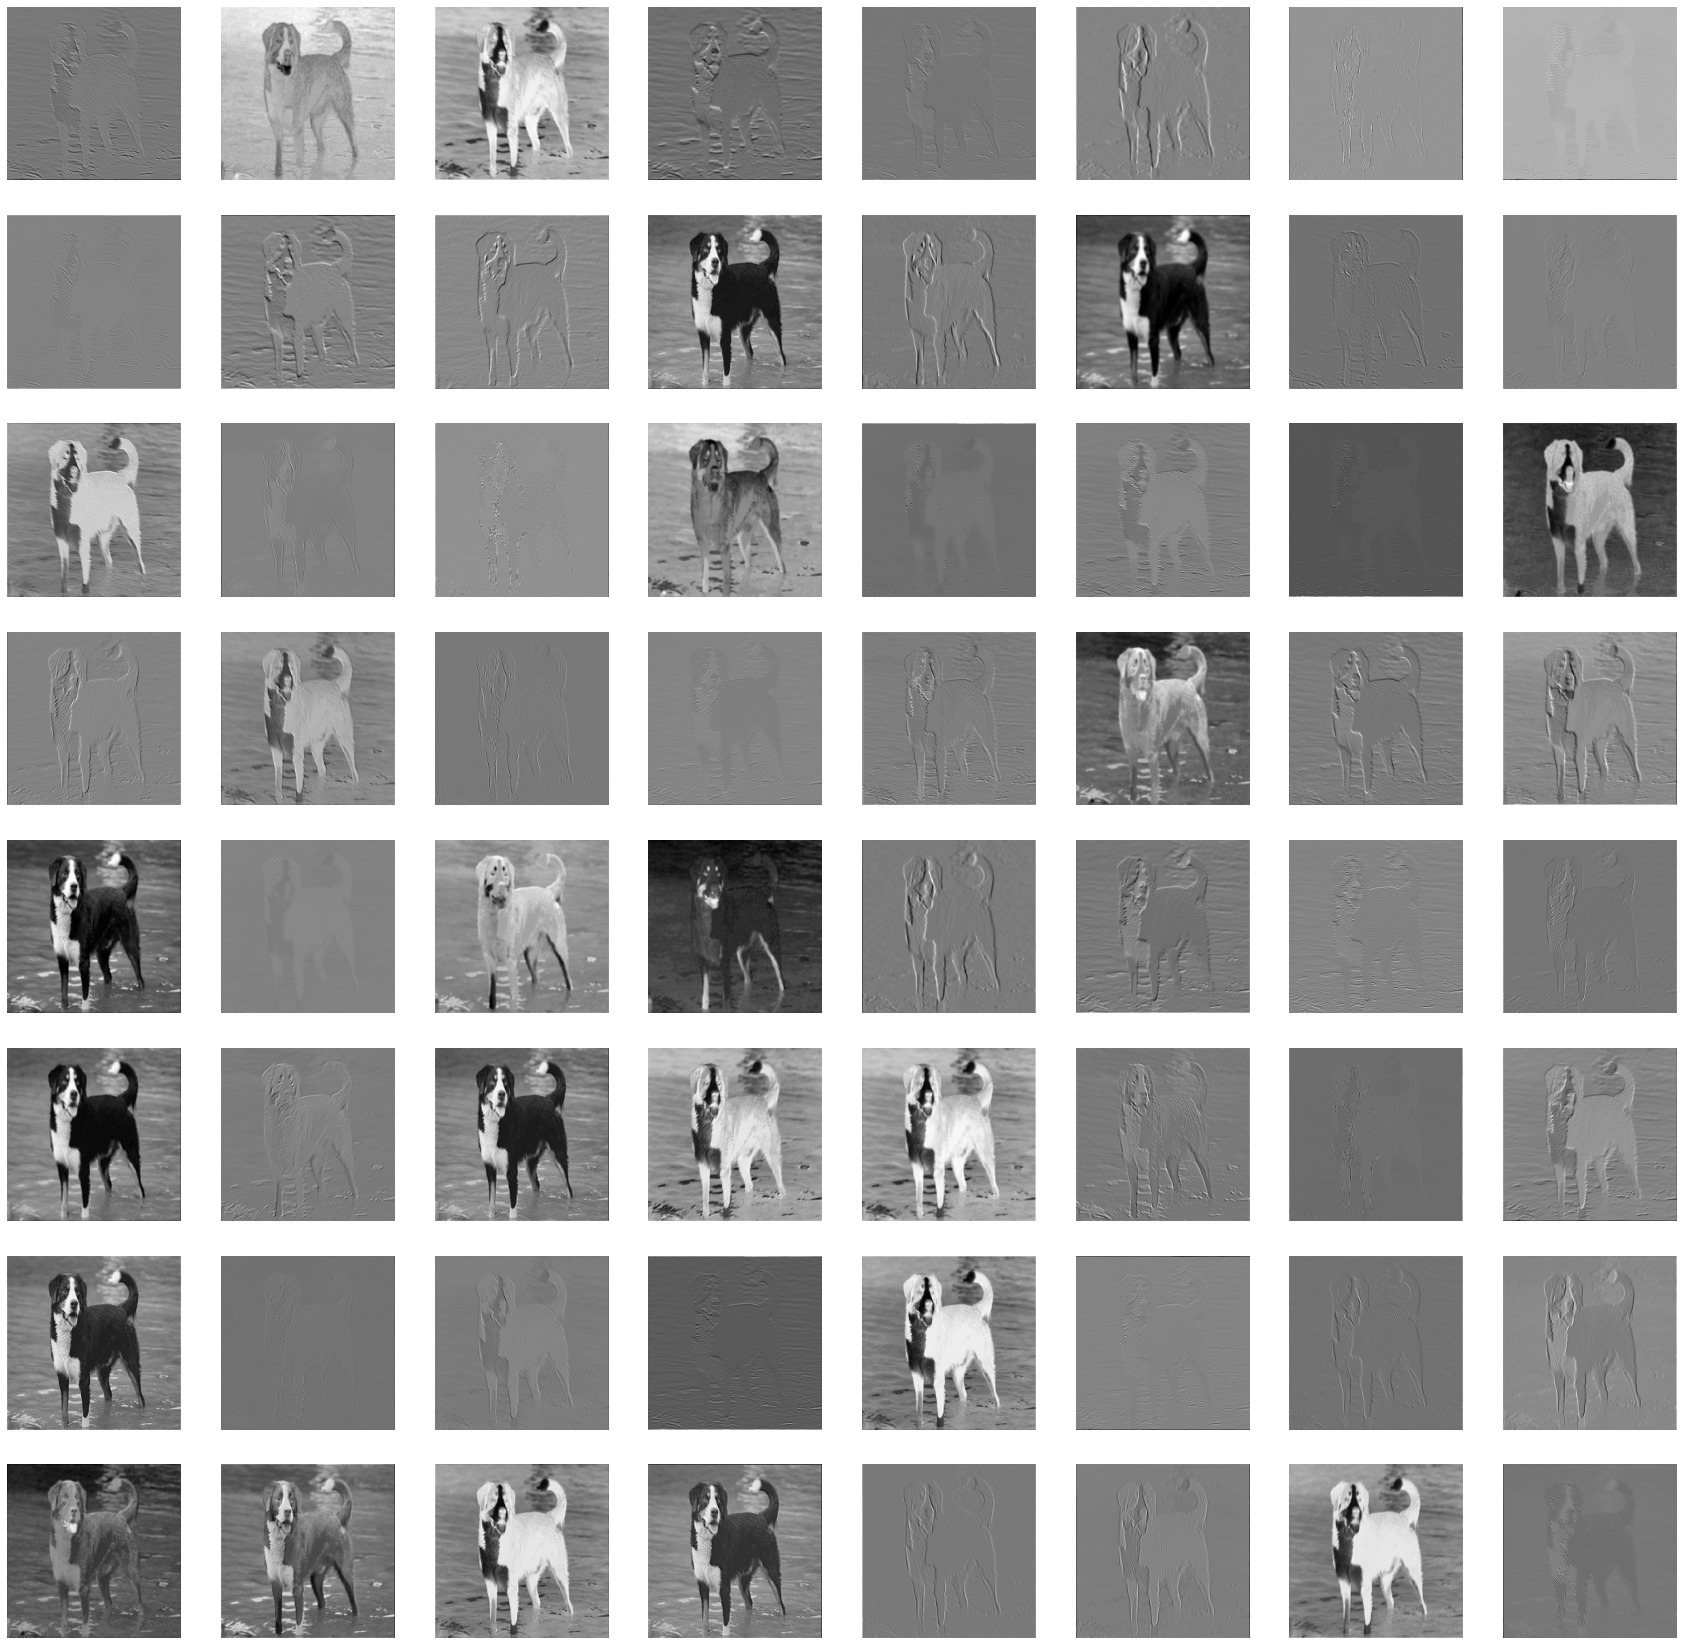

Size of layer 2 is torch.Size([64, 256, 256])
Feature maps from the first convolutional layer (layer 1) of ResNet-50 model


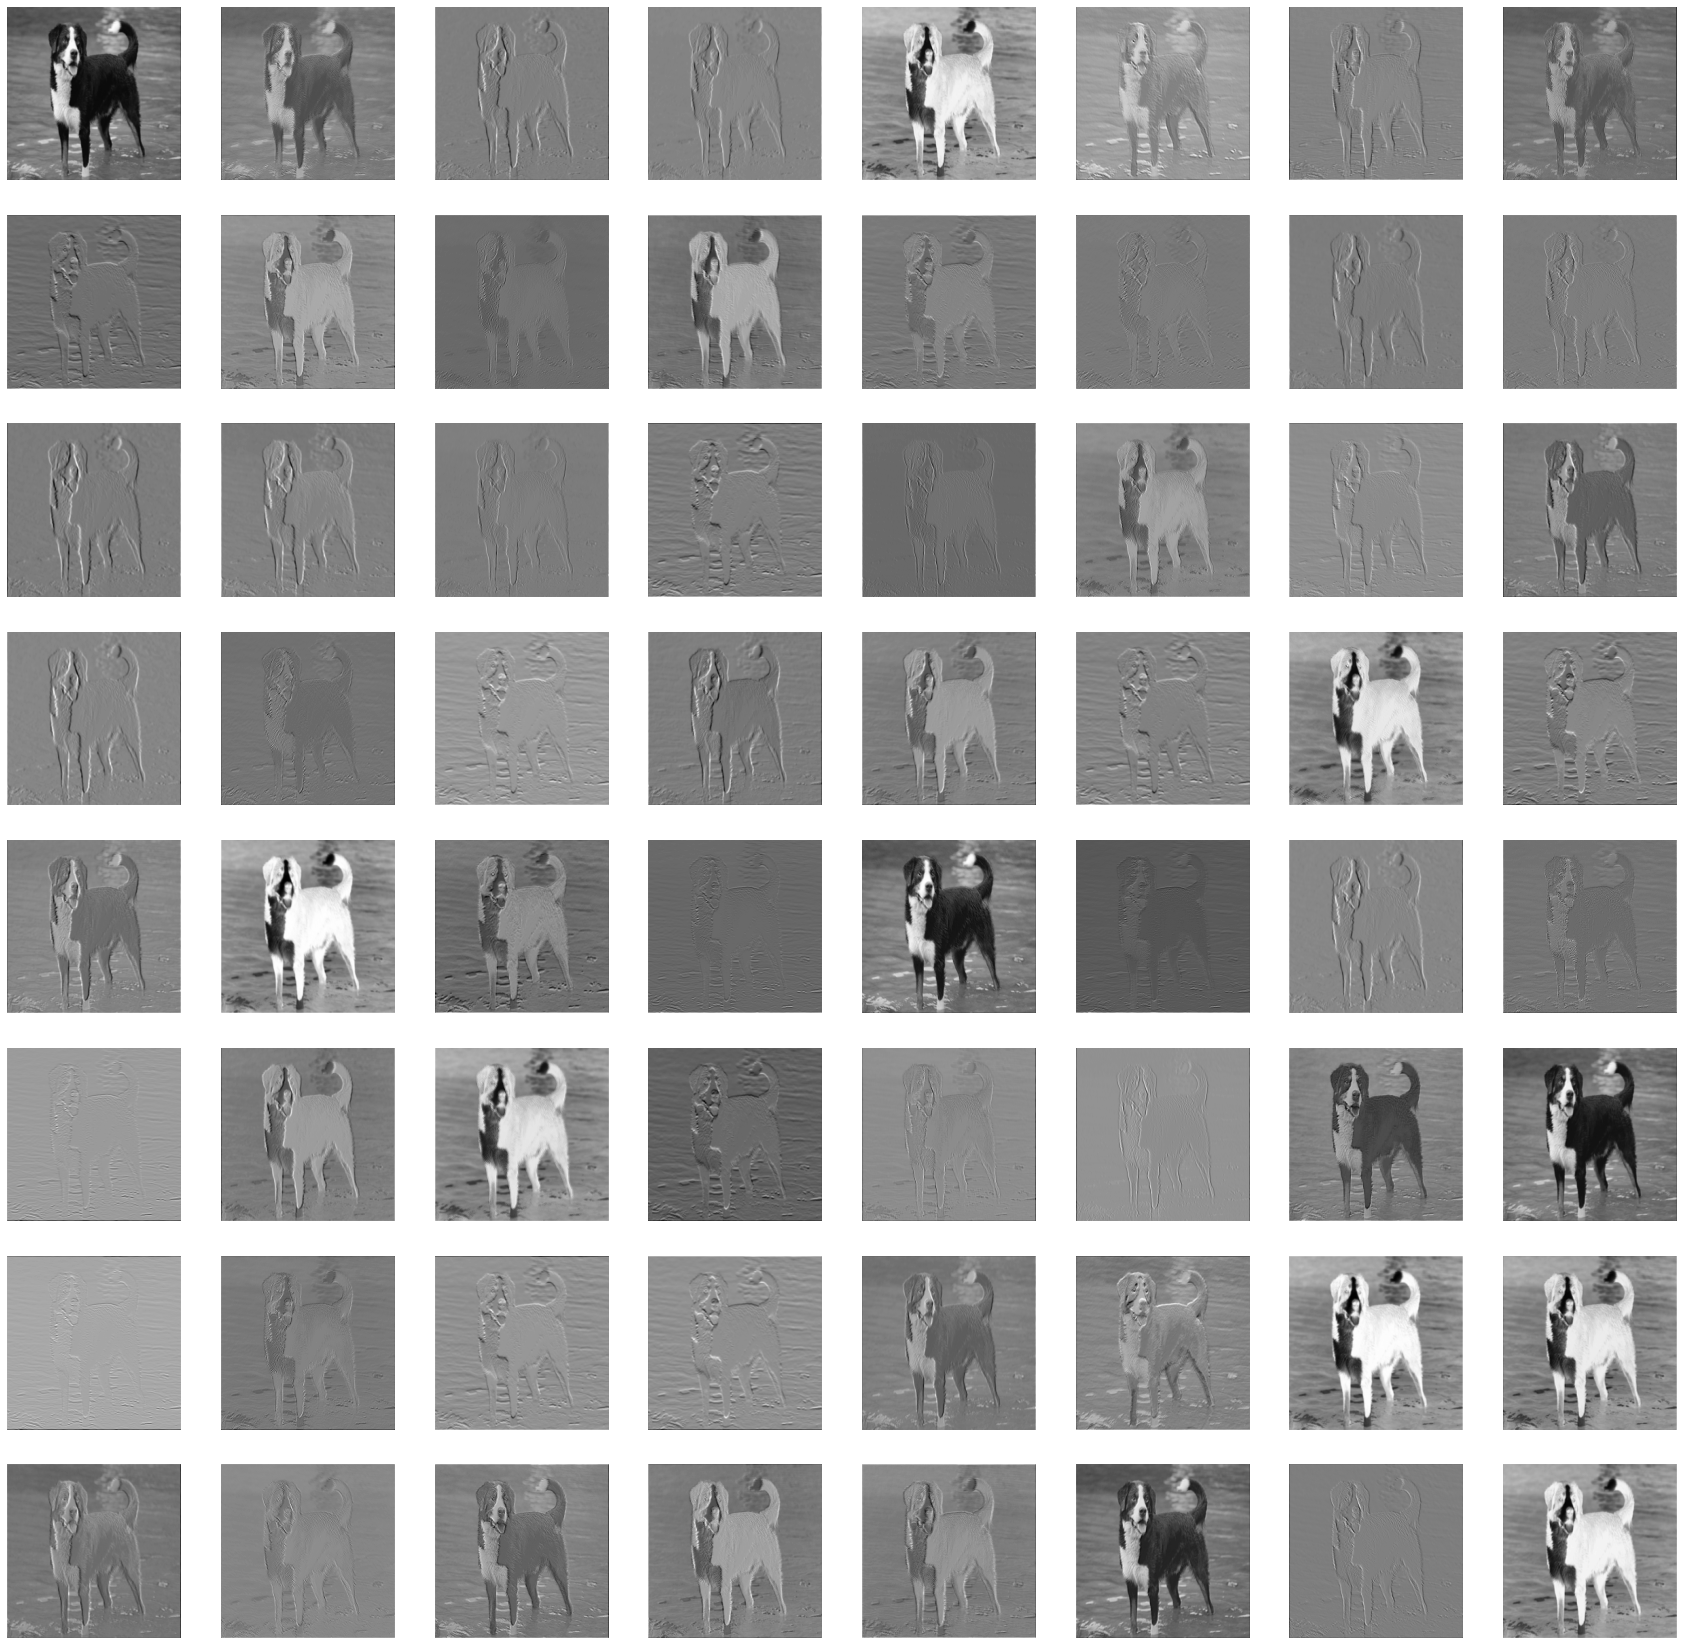

Size of layer 3 is torch.Size([64, 256, 256])
Feature maps from the first convolutional layer (layer 2) of ResNet-50 model


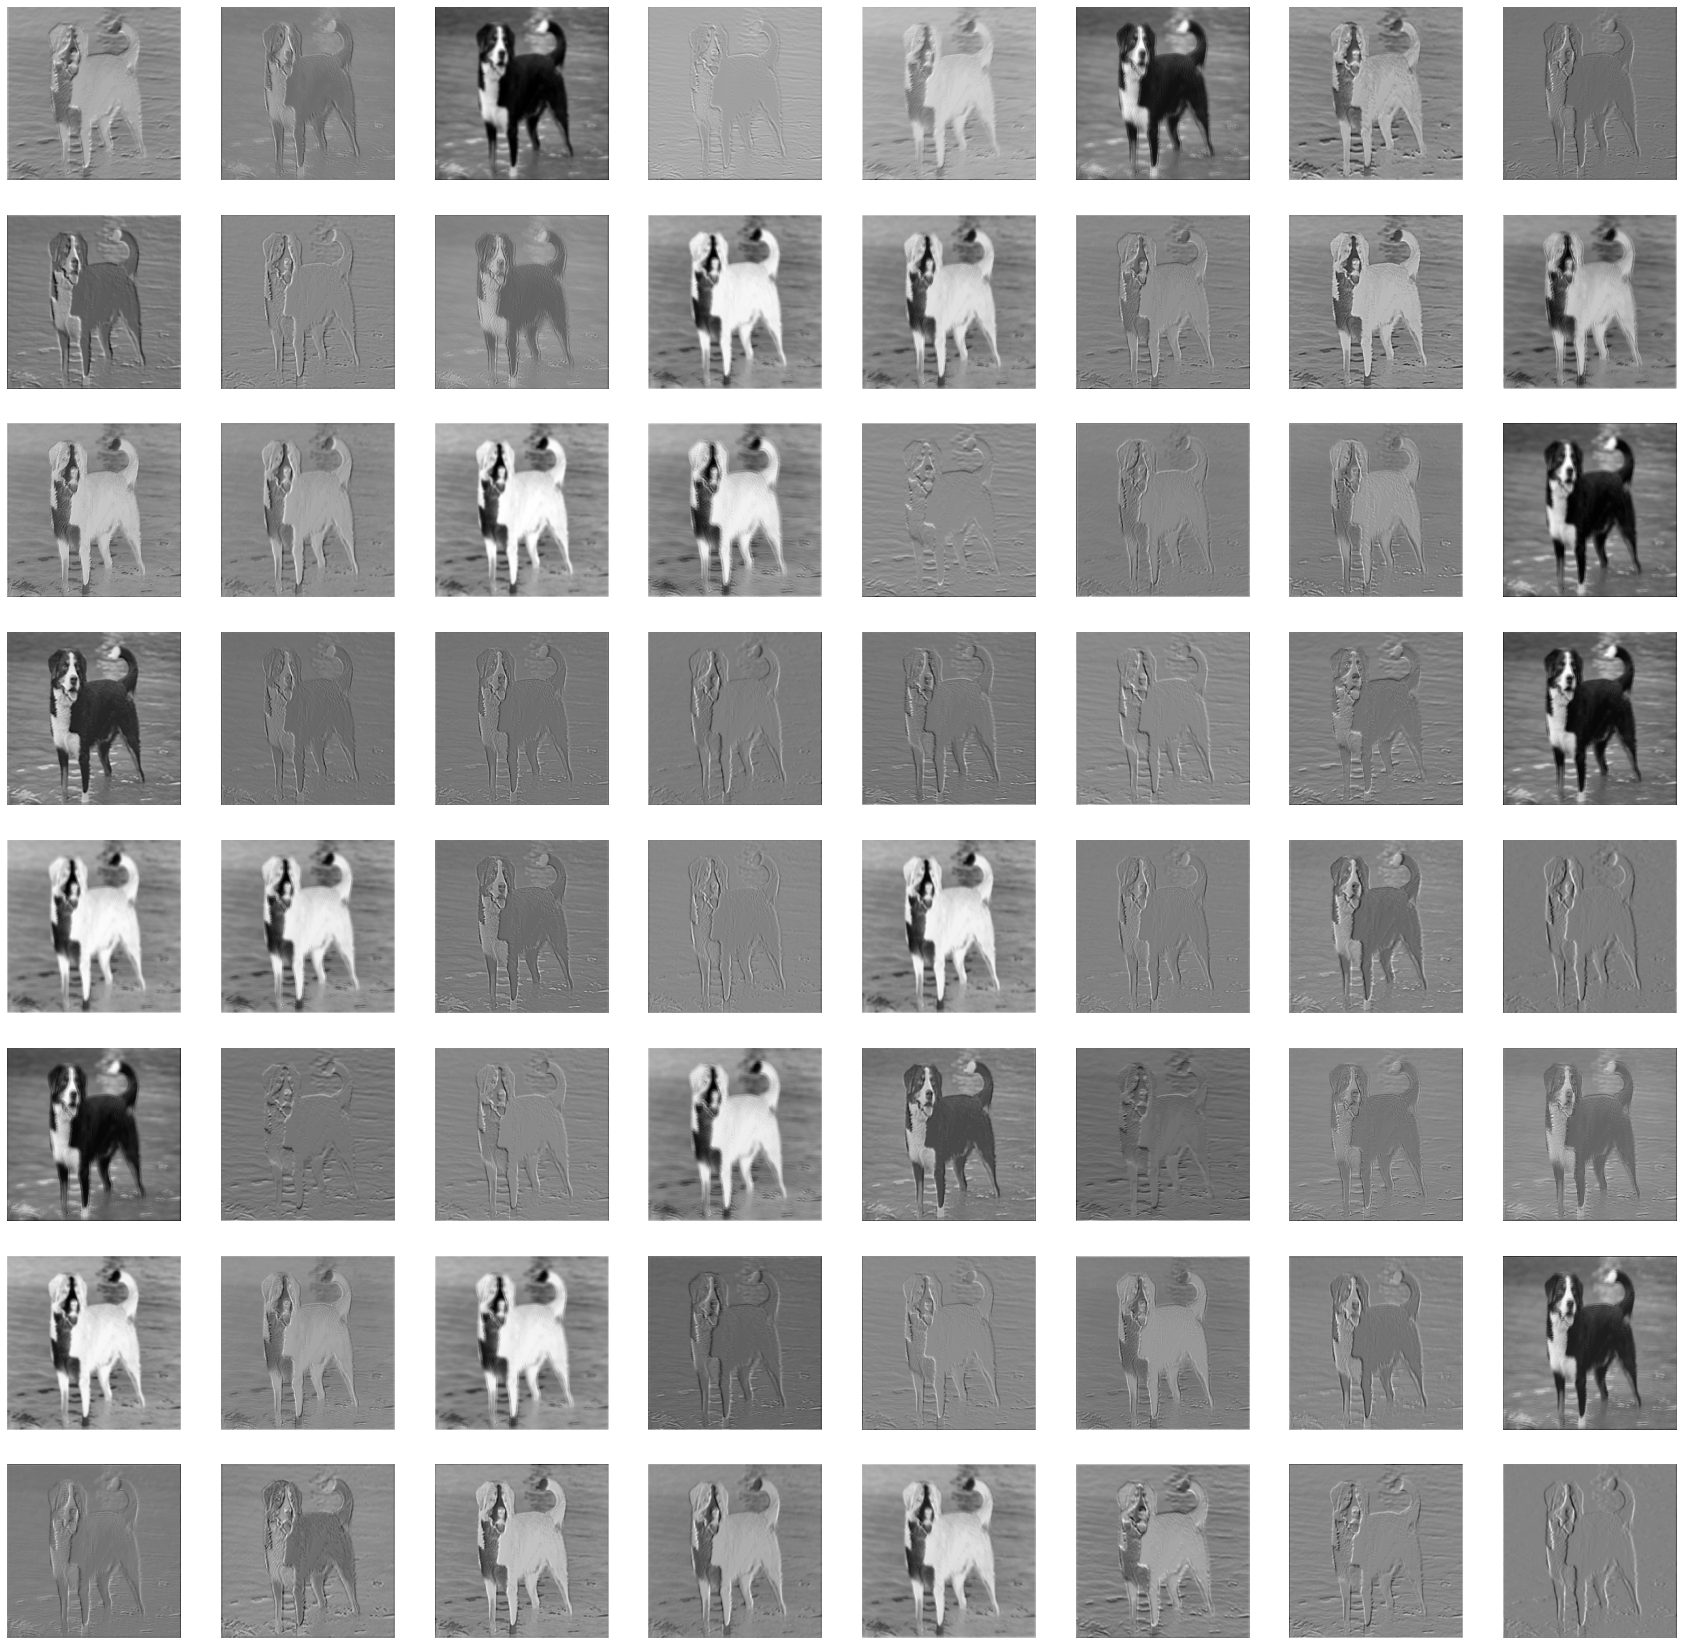

Size of layer 4 is torch.Size([256, 256, 256])
Feature maps from the first convolutional layer (layer 3) of ResNet-50 model


KeyboardInterrupt: ignored

In [10]:
# visualize 64 features from each layer 
# (although there are more feature maps in the upper layers)
for num_layer in range(len(outputs)):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(f'Size of layer {num_layer+1} is {layer_viz.size()}')
    print(f'Feature maps from the first convolutional layer (layer {num_layer}) of ResNet-50 model')
    for i, filter in enumerate(layer_viz):
        if i == 64: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    # print(f'Feature maps from the first convolutional layer (layer {num_layer}) of ResNet-50 model')
    # print(f"Saving layer {num_layer} feature maps...")
    # plt.savefig(f"../outputs/layer_{num_layer}.png")
    plt.show()
    plt.close()

## References 

This tutorial was based on:  